Write your homework based on in class exercise


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

**Hint for task1**: You need to reformulate the primal form such that it is a matrix formate and fit in the CVXOPT optimization package. Will have some extra explaination in section.

**Task 1** [10-points]: Given a set of data point use SVM to seperate the points based on label. 

Use hard margin SVM to solve this task

Use this package to solve hard margin optimization problem
https://cvxopt.org/userguide/coneprog.html

Plot out the result including:

1. The original data points
2. the linear boundary of the plot
3. Mark wich points were used as the support vector

Example:
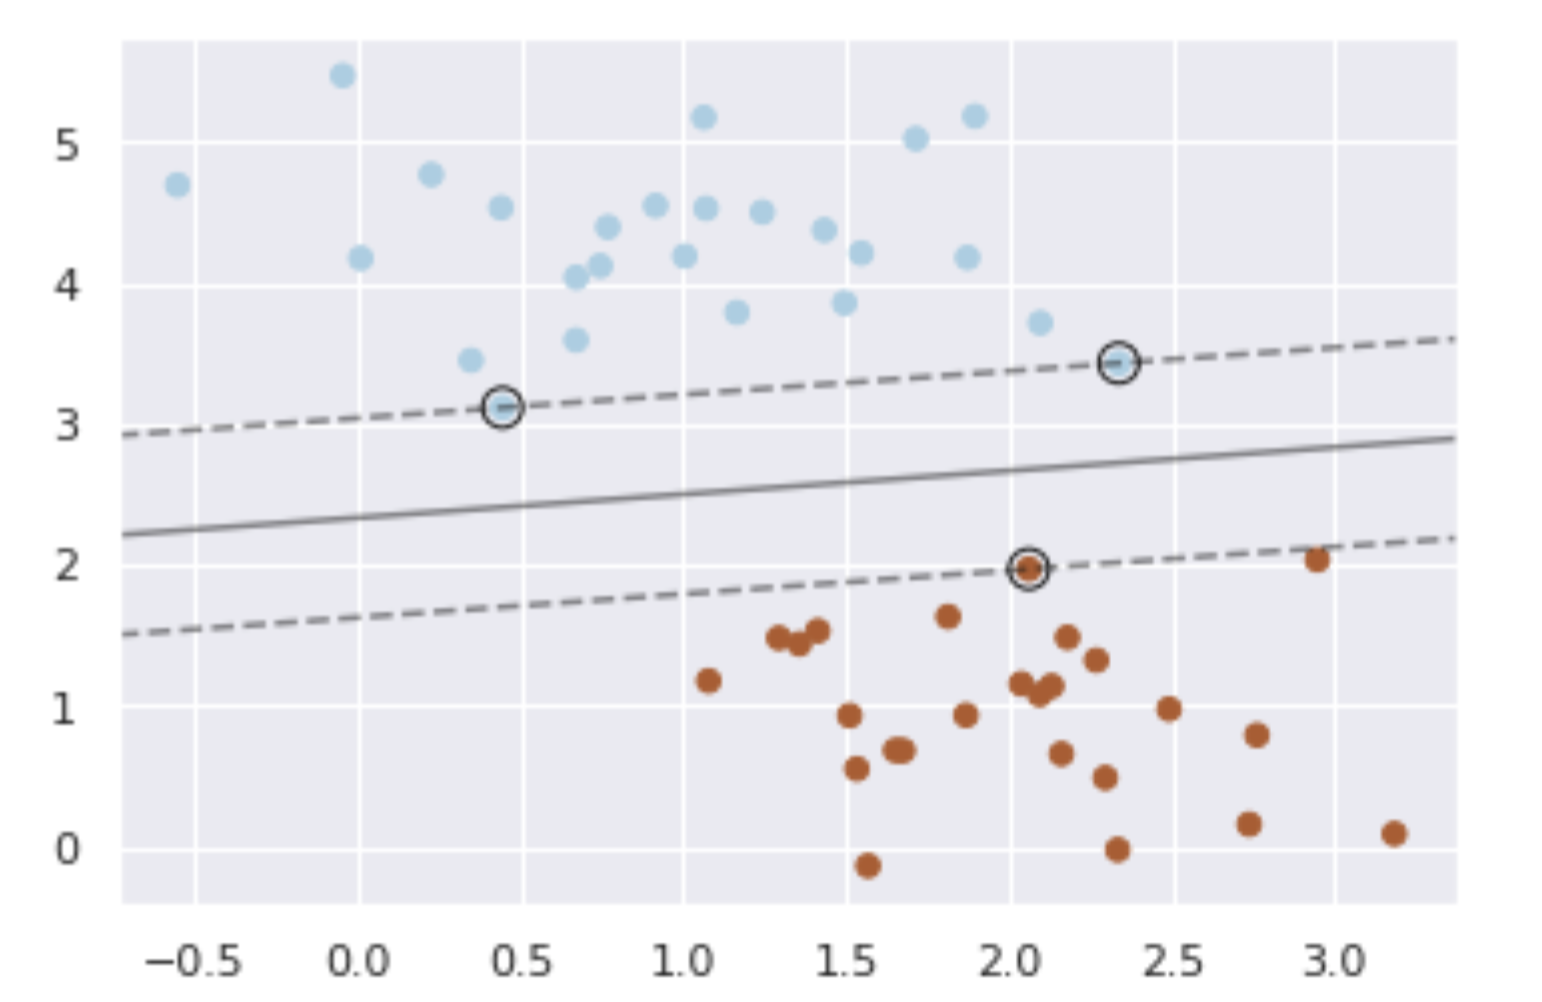

**Extra credit** [5-points]: Can you use gradient descent to approximate this task? If so make it happen :)

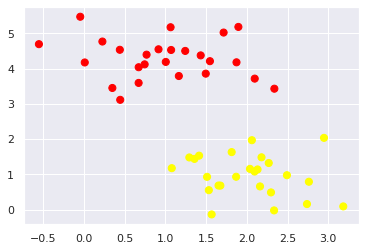

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

     pcost       dcost       gap    pres   dres
 0: -5.4460e+00 -9.4886e+00  1e+02  1e+01  2e+00
 1: -5.1039e+00 -2.7069e+00  2e+01  2e+00  3e-01
 2: -5.7137e-01 -1.3287e+00  8e-01  5e-16  7e-15
 3: -9.2829e-01 -1.0372e+00  1e-01  3e-16  3e-15
 4: -1.0221e+00 -1.0261e+00  4e-03  4e-16  4e-15
 5: -1.0254e+00 -1.0254e+00  4e-05  1e-16  4e-15
 6: -1.0254e+00 -1.0254e+00  4e-07  3e-16  3e-15
Optimal solution found.


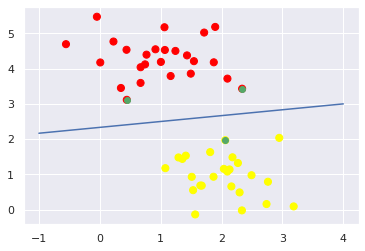

In [ ]:
# Beginning of student code (Logan)
# The majority of this code is based off of this document: https://xavierbourretsicotte.github.io/SVM_implementation.html

# Import necessary libraries
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

# First change all the 0's to -1's in y
for i, elem in enumerate(y):
  if elem == 0:
    y[i] = -1

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1, 1) * 1.
X_dash = y * X
H = np.dot(X_dash, X_dash.T) * 1.

# Convert our numpy arrays into the cvxopt format (All given in the document I linked above)
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m,1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

# thetas = w in example
thetas = ((y * alphas).T @ X).reshape(-1,1)
#thetas = thetas.flatten()
#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

# Find the mean for the bias
bias = y[S] - np.dot(X[S], thetas)
bias_total = 0
for i, elem in enumerate(bias):
  bias_total += elem
bias_mean = bias_total / bias.size

# Plot the line
x1 = np.linspace(-1, 4)
x2 = (-bias_mean - thetas[0] * x1) / thetas[1]
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plt.plot(x1, x2)

# Highlight the support vector points
for i, elem in enumerate(S):
  if elem == True:
    x1 = X[i][0]
    x2 = X[i][1]
    plt.plot(x1, x2, 'go') # 'go' marks the points with a green circle

  

**Task 2** [20-points]: Given a set of data point which is [non-linear separable] use SVM to seperate the points based on label. 

Use Soft margin SVM to solve this task, tune the soft margin parameters and report the accuracy. 

Plot out the result for each SVM you build including: 

1. The original data points
2. the linear boundary of the plot
3. Mark wich points were used as the support vector

Extra credit[5-points]: Use Matrix multiplication when solve this task instead of using for loop to do element wise calculation. 



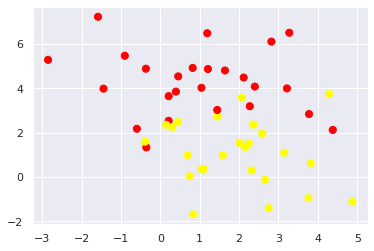

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


     pcost       dcost       gap    pres   dres
 0: -1.1736e+02 -3.5106e+03  8e+03  6e-01  6e-14
 1: -9.4246e+01 -9.8936e+02  1e+03  4e-02  6e-14
 2: -1.1528e+02 -2.5410e+02  1e+02  5e-03  6e-14
 3: -1.4353e+02 -2.0818e+02  7e+01  2e-03  6e-14
 4: -1.5350e+02 -1.7403e+02  2e+01  5e-04  6e-14
 5: -1.5949e+02 -1.7071e+02  1e+01  1e-04  8e-14
 6: -1.6340e+02 -1.6423e+02  8e-01  7e-06  9e-14
 7: -1.6361e+02 -1.6396e+02  4e-01  3e-06  6e-14
 8: -1.6372e+02 -1.6376e+02  4e-02  2e-08  6e-14
 9: -1.6374e+02 -1.6374e+02  4e-04  2e-10  9e-14
10: -1.6374e+02 -1.6374e+02  4e-06  2e-12  5e-14
Optimal solution found.
Accuracy = 0.86


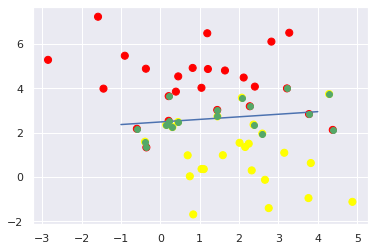

In [ ]:
# Beginning of student code (Logan)
# The majority of this code is based off of this document: https://xavierbourretsicotte.github.io/SVM_implementation.html

# Import necessary libraries
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

# First change all the 0's to -1's in y
for i, elem in enumerate(y):
  if elem == 0:
    y[i] = -1

#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#Computing parameters
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()

# Find the mean for the bias
bias = y[S] - np.dot(X[S], w)
bias_total = 0
for i, elem in enumerate(bias):
  bias_total += elem
bias_mean = bias_total / bias.size

# Plot the line
x1 = np.linspace(-1, 4)
x2 = (-bias_mean - w[0] * x1) / w[1]
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plt.plot(x1, x2)

# Highlight the support vector points
for i, elem in enumerate(S):
  if elem == True:
    x1 = X[i][0]
    x2 = X[i][1]
    plt.plot(x1, x2, 'go') # 'go' marks the points with a green circle

# Print accuracy - Largely from https://python.plainenglish.io/introducing-python-package-cvxopt-implementing-svm-from-scratch-dc40dda1da1f
right_pred = 0
length = X.shape[0]
for i in range(length):
  y_pred = np.sign(np.dot(np.array(X[i]), w) + bias_mean)[0]
  if y_pred == y[i]:
    right_pred += 1
print("Accuracy =", right_pred / length)

**Task 3** Neural Network [20 Points] 

Preprocess data [5 Points] + Train baseline model [10 Points] + build a better one [5 Points] = [20 Points] 

Build a nerual network for image classification on mnist

http://keras.io/api/datasets/mnist/

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


Step 1: Load Mnist dataset from keras and use plt package to show one of the images in the dataset

In [ ]:
# Helper function for image show
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title([train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

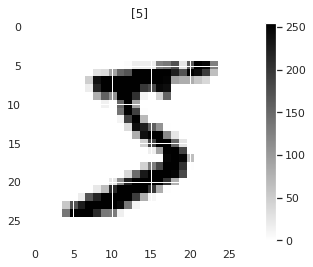

In [ ]:
# Your code
# Hint: use keras.datasets for dataset

# images as X and labels as y
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

show_image(0) #Show a random image in the dataset


Step 2: Normalize all the values of each pixel in the image from [0,255] to [0,1]

Print the min and max value of the data after the normalization.

In [ ]:
# Your code
# Hint: Don't use for loop and process each pixel individually

# train_images and test_images both have the pixels
# Divide both by 255
train_images = train_images/255
test_images = test_images/255

print("train_min =", np.amin(train_images))
print("test_min =", np.amin(test_images))
print("train_max =", np.amax(train_images))
print("test_max =", np.amax(test_images))

train_min = 0.0
test_min = 0.0
train_max = 1.0
test_max = 1.0


Step 3: Reshape the input image

Now you you suppose to have training/testing data tensor with the size of [#images, 28, 28]. However this assignment is asking to use multilayer perception neural network, which doesn't take 2D images. Faltten the image using **reshape** function such that both training and testing data will have the size of [#images, 784]. **Note**: 28*28 = 784

Print the shape of the data after reshapping


Note: the provided code use ficticious image and labels, replace it with your data

In [ ]:
# Given - Don't think it's needed
# I also believe "test_labels" should have been of size (1000,) not (60000,)
#train_images = np.random.rand(60000, 784)
#train_labels = np.zeros(60000,dtype=int)
#test_images  = np.random.rand(10000, 784)
#test_labels = np.zeros(60000,dtype=int)

# Your code
### YOUR CODE HERE ###
train_images = np.reshape(train_images, (60000, 784))
test_images  = np.reshape(test_images, (10000, 784))

print("train_images.shape =", train_images.shape)
print("train_labels.shape =", train_labels.shape)
print("test_images.shape =", test_images.shape)
print("test_labels.shape =", test_labels.shape)

train_images.shape = (60000, 784)
train_labels.shape = (60000,)
test_images.shape = (10000, 784)
test_labels.shape = (10000,)


Step 4: Create Dataframe for both training and testing data. 



In [ ]:
# In order to make this task a bit more interesting, we add some noise to the input image :)
noise_level = 0.3
train_images = train_images*(1-noise_level) + np.random.rand(60000, 784)*noise_level
test_images  = test_images *(1-noise_level) + np.random.rand(10000, 784)*noise_level

# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z745,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label
0,0.233866,0.006735,0.179966,0.208623,0.247637,0.016801,0.144032,0.160611,0.050737,0.096735,0.132067,0.249963,0.278822,0.188527,0.118484,0.076209,0.294641,0.294906,0.277493,0.235701,0.097734,0.245100,0.122638,0.098032,0.223460,0.023896,0.014569,0.134386,0.133692,0.268693,0.037846,0.036985,0.044236,0.008921,0.021520,0.197961,0.129475,0.229081,0.297779,0.197710,...,0.096921,0.251691,0.089302,0.197929,0.041095,0.206060,0.273990,0.182575,0.167957,0.288335,0.188219,0.077865,0.087717,0.211592,0.220631,0.091049,0.103603,0.297317,0.030586,0.121394,0.018734,0.246324,0.027704,0.202202,0.016945,0.201857,0.252911,0.119646,0.156638,0.120463,0.090147,0.240979,0.081601,0.216883,0.061859,0.074956,0.100938,0.176747,0.136327,5
1,0.223543,0.064070,0.003202,0.232967,0.246495,0.017844,0.183272,0.113462,0.238169,0.262324,0.255301,0.233161,0.080716,0.243567,0.160044,0.015827,0.137082,0.282647,0.266358,0.030679,0.223238,0.241738,0.081416,0.141483,0.213296,0.131712,0.033839,0.211765,0.273492,0.195745,0.232140,0.107509,0.054959,0.192832,0.098331,0.258022,0.036788,0.130039,0.119018,0.281416,...,0.272285,0.253931,0.147134,0.011116,0.160576,0.211439,0.101749,0.033319,0.083570,0.231477,0.105373,0.243594,0.095856,0.049067,0.130755,0.135682,0.004832,0.035114,0.055478,0.034076,0.102458,0.289387,0.152767,0.188267,0.106916,0.097046,0.006944,0.150100,0.145083,0.047349,0.229297,0.147802,0.101698,0.044073,0.165648,0.225845,0.084600,0.065638,0.156580,0
2,0.046603,0.199984,0.181603,0.026125,0.010956,0.186087,0.088288,0.025934,0.227829,0.094213,0.137880,0.071044,0.188195,0.090447,0.290406,0.210884,0.041017,0.125008,0.115626,0.160274,0.252579,0.175027,0.018467,0.196625,0.002480,0.233988,0.199991,0.092636,0.087733,0.239482,0.235001,0.105691,0.089684,0.167947,0.002510,0.024800,0.037851,0.055624,0.153605,0.297673,...,0.279763,0.074541,0.192760,0.082538,0.152143,0.235888,0.264517,0.251609,0.174654,0.074645,0.198370,0.212972,0.003208,0.131763,0.252979,0.146876,0.093413,0.261539,0.046764,0.061934,0.206212,0.105731,0.213905,0.047311,0.075681,0.046994,0.285873,0.121621,0.101166,0.004261,0.046025,0.126341,0.020551,0.153222,0.136505,0.230150,0.197941,0.133784,0.067398,4
3,0.218059,0.212359,0.045989,0.274426,0.019322,0.016511,0.056205,0.272838,0.155999,0.236382,0.068353,0.147067,0.107487,0.248349,0.006781,0.073153,0.045772,0.257757,0.140263,0.121266,0.134845,0.291577,0.255080,0.211911,0.087144,0.049552,0.276430,0.126923,0.083627,0.141276,0.275354,0.116120,0.168792,0.240890,0.128140,0.070063,0.298358,0.286971,0.253044,0.206512,...,0.234156,0.086044,0.120734,0.221851,0.290554,0.136641,0.248857,0.292521,0.262042,0.068145,0.002410,0.147625,0.159408,0.060375,0.085402,0.229546,0.141104,0.095206,0.186788,0.195828,0.230819,0.047013,0.222455,0.179829,0.017272,0.233234,0.114924,0.099114,0.134423,0.103853,0.101486,0.242423,0.037352,0.291180,0.166479,0.054877,0.039365,0.177453,0.189900,1
4,0.015908,0.072901,0.238639,0.014887,0.256527,0.197449,0.130327,0.103930,0.005775,0.247564,0.042817,0.092863,0.170732,0.073798,0.149142,0.242803,0.141161,0.284693,0.254250,0.099912,0.119989,0.126998,0.187854,0.086039,0.290775,0.182605,0.119820,0.193503,0.118622,0.245339,0.170352,0.012591,0.053027,0.259498,0.168870,0.285103,0.021727,0.088578,0.058063,0.166152,...,0.802246,0.309170,0.010425,0.266665,0.192479,0.193066,0.270653,0.152504,0.123155,0.259839,0.222726,0.284693,0.282037,0.114698,0.134096,0.076795,0.198194,0.109363,0.235830,0.036465,0.034921,0.061337,0.025288,0.186009,0.044206,0.047989,0.004268,0.234627,0.243689,0.048607,0.221857,0.130064,0.071878,0.186415,0.053545,0.227065,0.014285,0.287739,0.021563,9


In [ ]:
# Build the one for testing as well :)
# Your code:
img_data = {f"z{i}":test_images[:,i] for i in range(784)}
img_data["label"] = test_labels
df_img_train = pd.DataFrame(img_data)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z745,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label
0,0.139272,0.129368,0.246015,0.088877,0.106935,0.091352,0.232574,0.245515,0.008737,0.053814,0.058167,0.158241,0.073885,0.277744,0.108431,0.297880,0.057504,0.211052,0.230301,0.103304,0.101451,0.247577,0.000044,0.059542,0.167325,0.231977,0.060275,0.086477,0.143148,0.212004,0.075973,0.090501,0.166373,0.258268,0.138767,0.132857,0.066355,0.243512,0.160840,0.083790,...,0.062701,0.209096,0.124952,0.062037,0.084073,0.252144,0.157146,0.147067,0.040667,0.091841,0.285860,0.240925,0.155486,0.082621,0.293712,0.136735,0.096342,0.135182,0.292030,0.298960,0.277907,0.127660,0.031777,0.225452,0.196618,0.232034,0.004201,0.121333,0.241009,0.148781,0.221600,0.096739,0.255074,0.073548,0.206124,0.063069,0.261220,0.207853,0.275178,7
1,0.178666,0.181003,0.144434,0.020316,0.274272,0.054843,0.261729,0.120934,0.004237,0.226624,0.292445,0.134944,0.130246,0.210894,0.292694,0.162550,0.221809,0.128901,0.284639,0.157735,0.116644,0.202832,0.241740,0.075687,0.182528,0.010032,0.184119,0.092809,0.163513,0.062236,0.235502,0.293187,0.087589,0.290321,0.096658,0.299707,0.038413,0.197461,0.042349,0.219184,...,0.160370,0.034434,0.156359,0.261537,0.149809,0.051594,0.202274,0.236530,0.211088,0.192394,0.038155,0.028430,0.087887,0.144636,0.220195,0.001803,0.150554,0.278513,0.124626,0.025393,0.243115,0.059849,0.098637,0.269149,0.107004,0.079647,0.123766,0.260375,0.288304,0.286170,0.236676,0.063074,0.116653,0.024072,0.177018,0.293890,0.191812,0.025752,0.133190,2
2,0.028520,0.187117,0.276591,0.293308,0.002042,0.253300,0.006764,0.184587,0.209253,0.019200,0.034617,0.147722,0.276973,0.021817,0.135842,0.130918,0.103222,0.177099,0.255138,0.086400,0.095810,0.099131,0.102420,0.243021,0.213047,0.070950,0.098813,0.247975,0.276677,0.112404,0.057365,0.028845,0.275565,0.223752,0.283392,0.250698,0.196200,0.192605,0.231417,0.277269,...,0.094257,0.119264,0.241870,0.268234,0.101686,0.231306,0.206291,0.000748,0.224973,0.183559,0.188700,0.200936,0.116930,0.228267,0.003584,0.039289,0.167221,0.228827,0.002893,0.149308,0.262093,0.014595,0.157219,0.173295,0.269259,0.235444,0.179027,0.070717,0.180256,0.006613,0.060108,0.084869,0.195775,0.271380,0.178858,0.288416,0.282845,0.028177,0.213767,1
3,0.279494,0.052778,0.096701,0.004134,0.052201,0.288158,0.030984,0.046424,0.243463,0.068741,0.243944,0.073132,0.116030,0.230877,0.180328,0.231444,0.234224,0.113617,0.120359,0.029043,0.234675,0.092633,0.222727,0.135575,0.260158,0.112666,0.211882,0.166023,0.297714,0.146642,0.260274,0.201107,0.265515,0.004261,0.070906,0.201693,0.138265,0.296613,0.146797,0.203794,...,0.248625,0.180904,0.069296,0.001390,0.177666,0.073803,0.011614,0.264370,0.087610,0.230599,0.054906,0.010777,0.293816,0.273302,0.095090,0.064392,0.087051,0.119029,0.049626,0.115680,0.248142,0.067767,0.047223,0.078418,0.092402,0.023471,0.215667,0.247623,0.150390,0.208072,0.277687,0.144056,0.273354,0.199350,0.062165,0.083248,0.256484,0.268690,0.120228,0
4,0.178351,0.143193,0.096661,0.056016,0.080029,0.125467,0.130511,0.242271,0.074181,0.077375,0.144880,0.181794,0.104052,0.012835,0.191155,0.260866,0.098402,0.259992,0.162304,0.063571,0.108778,0.161969,0.279655,0.146650,0.001928,0.104331,0.251930,0.232730,0.233766,0.146357,0.275584,0.271094,0.112456,0.226045,0.273076,0.075403,0.176937,0.026048,0.098848,0.038897,...,0.245384,0.079256,0.122913,0.054983,0.018994,0.187860,0.286529,0.249908,0.129346,0.010039,0.260879,0.254049,0.034460,0.264707,0.044397,0.211886,0.214123,0.110527,0.112803,0.224176,0.227988,0.006034,0.055128,0.093859,0.110182,0.134900,0.207776,0.215555,0.168806,0.141063,0.071823,0.171189,0.096875,0.175460,0.293684,0.182612,0.279494,0.226826,0.047498,4


Step 5: Build nerual network

Build a baseline nueral network including only hidden layer dense layer with width of 5, use relu as the activateion function. 

Use Adam for optimization with learning rate of 0.001

Note that: we are now doint classification of 10 different classes. Width of the output layer should be 10, and use sigmoid. 

In [ ]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer
from keras.models import Sequential

# DEFINE YOUR MODEL HERE
### YOUR CODE HERE ###
#Code from https://keras.io/examples/vision/mnist_convnet/
input_shape = 784
hidden_width = 5
num_classes = 10
model = keras.Sequential(
    [
      Input(shape=(input_shape)),
      Dense(hidden_width, activation="relu"),
      Dense(num_classes, activation="sigmoid"),
    ]
)

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# Show a summary of your model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Shuffle the data
def get_data_subset(df, shuffle=True, shuffle_seed=42):
    """
    Used to retrieve columns from df
    """
    
    data = df.filter(regex=("z[0-9]+")).values
    labels = df["label"].values
    if shuffle:
        np.random.seed(shuffle_seed)
        np.random.shuffle(data)
        np.random.seed(shuffle_seed)
        np.random.shuffle(labels)

    return data, labels.reshape(-1,1)
    
X, y = get_data_subset(df_img_train)
X.shape

(10000, 784)

Use One hot encode for y

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Your code
# Went off of https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.fit_transform
enc = OneHotEncoder()
enc.fit(y)

y_enc = enc.transform(y).toarray()
y_enc.shape

(10000, 10)

Training time :)

In [ ]:
hist = model.fit(X, y_enc,
                    epochs = 50, 
                    batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 2.2546 - accuracy: 0.1768 - val_loss: 2.1461 - val_accuracy: 0.2525
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 2.1110 - accuracy: 0.2585 - val_loss: 2.0251 - val_accuracy: 0.2805
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 1.9967 - accuracy: 0.2947 - val_loss: 1.9306 - val_accuracy: 0.3040
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 1.9110 - accuracy: 0.3319 - val_loss: 1.8502 - val_accuracy: 0.3590
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8264 - accuracy: 0.3841 - val_loss: 1.7794 - val_accuracy: 0.3925
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 1.7543 - accuracy: 0.4090 - val_loss: 1.7140 - val_accuracy: 0.4315
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 1.6847 - accuracy: 0.4413 - val_loss: 1.6544 - val_accuracy: 0.4525
Epoch 8/50
16/16 [=

In [ ]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

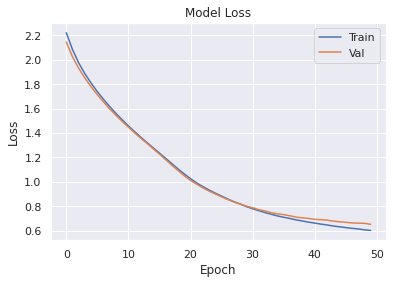

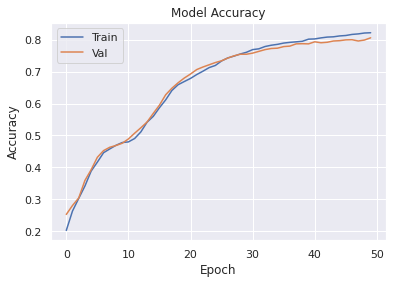

In [ ]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

**Final step: Build a better one** Don't forget this worth 5 points

Note that this is a simple task, but we only achieve 0.8314 accuracy on the validation set. Try finding out what is wrong with the baseline method, beat it! Your goal is to get accuracy at around 95.

In [ ]:
# Helper functions
def get_data_subset(df, shuffle=True, shuffle_seed=42):
    """
    Used to retrieve columns from df
    """
    
    data = df.filter(regex=("z[0-9]+")).values
    labels = df["label"].values
    if shuffle:
        np.random.seed(shuffle_seed)
        np.random.shuffle(data)
        np.random.seed(shuffle_seed)
        np.random.shuffle(labels)

    return data, labels.reshape(-1,1)

def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
    
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 0s 13ms/step - loss: 2.3531 - accuracy: 0.1004 - val_loss: 2.3134 - val_accuracy: 0.1010
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 2.3009 - accuracy: 0.1192 - val_loss: 2.3089 - val_accuracy: 0.1070
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 2.2938 - accuracy: 0.1274 - val_loss: 2.3150 - val_accuracy: 0.0905
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 2.2858 - accuracy:

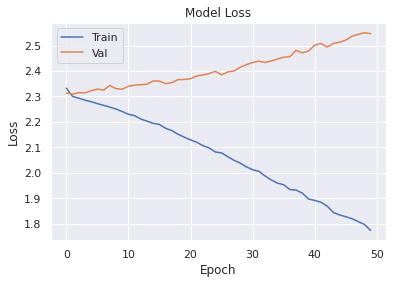

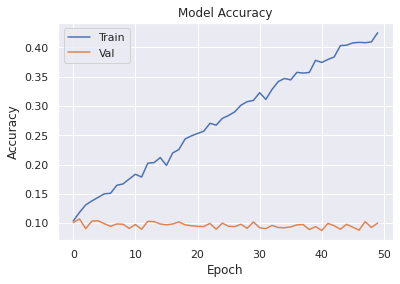

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

#Code from https://keras.io/examples/vision/mnist_convnet/
input_shape = 784
hidden_width = 100
num_classes = 10
model = keras.Sequential(
    [
      keras.Input(shape=(input_shape)),
      layers.Dense(hidden_width, activation="relu"),
      layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# Show a summary of your model
model.summary()

# Shuffle the data    
X, y = get_data_subset(df_img_train)
X.shape

# Use One hot encode for y
from sklearn.preprocessing import OneHotEncoder
# Went off of https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.fit_transform
enc = OneHotEncoder()
enc.fit(y)

y_enc = enc.transform(y).toarray()
y_enc.shape

# Training time
hist = model.fit(X, y_enc,
                    epochs = 50, 
                    batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)